## Graph Embedding

### What is graph embedding
- **A graph** G = (V,E) is a set of vertices and a set of edges connecting these vertices. 
- **An embedded graph** is a drawing, a representation of the graph on some surface, where no edges cross. This is also called a **planar graph**.

#### Properties: Kuratowski's Theorem
A finite graph is planar if and only if it does not contain a subgraph that is a subdivision of K5 or K3,3.

### Clusters vs. Communities
A cluster is a set of points close to each other, and far from other points. Whereas a community is a set of nodes with more links among them than to other parts of the network.

### Common features of Graphs
- No rules or centralized design: Local decisions
- No node or edge has global information: nodes only know their neighbor
- Suggestion of random models (n vertices, every edge(u,v) exists independently with probability p)

### Properties of Graphs
1) Giant component: a connected component that is larger than other connected components / significant fraction of a whole network. To find such components, start at a vertex and run Breadth-First-Search/Depth-First-Search

2) Clustering

3) Short paths

**Source**: https://networkx.github.io/documentation/latest/reference/algorithms/index.html

**!!!!(May look more deeply to the algorithms that are proposed in this link)!!!!**

## Graph Layout

**Source**:

- Networkx Algorithms for graph layout: https://networkx.github.io/documentation/latest/_modules/networkx/drawing/layout.html
- https://ndres.me/post/friend-graph-tutorial/ --> Good example on Graph layout for friends on facebook
- Igraph Layout : http://igraph.org/python/doc/igraph.layout.Layout-class.html  --> Manipulation of layouts such as scaling, rotating, ...

Other Algorithms found:
- Force-directed graph drawing: https://en.wikipedia.org/wiki/Force-directed_graph_drawing
- Types of Force-directed layouts: https://www.slideshare.net/junsungyoon/allegro-layout-forcedirectedlayout


The two most interesting graph layout in the library of networkx.drawing.layout are:
    1. spring_layout
    2. spectral_layout
    
And some others:
    3. bipartite_layout
    4. circular_layout
    5. kamada_kawai_layout
    6. random_layout
    7. rescale_layout
    8. shell_layout
    9. fruchterman_reingold_layout
    
### Force-Directed graph algorithms
**Source**: D3Wiki https://d3-wiki.readthedocs.io/zh_CN/master/Layouts/

Simple concept where linked nodes attract each other, and where non-linked nodes repulse each other. This gives an illusion of communities.
    
### Spring Layout
This is an algorithm that places the nodes using the Fruchterman-Reingold force-directed algorithm. But using nx.spring_layout() will give you different graphs each time. Thus to fix these positions, we use the following layout, which is spectral layout.

### Spectral Layout
Positions nodes using eigen-vectors of the graph laplacian.

## Gephi

It is a software for network visualization and manipulation.

### Graph Visualization:
- Zoom with mouse wheel
- Move/Drag graph in the window by right-clicking with the mouse
- Reset the position of the graph in the center of the window
- When passing over a node, its edged and linked-nodes stay in bright color, every other nodes and edges are pale.
- Adapt color, thickness of the edges
- Adapt color, size of the nodes, by their degree or not (darker color if high degree)
- Can show labels
- A statisics module, where metrics are computed and used to color and display the graph (ex: clustering coefficient, communitity detection)
- Filtering methods (ex: filter such that leaves are removed from graph)

### Graph Layout:
- We can choose graph layouts such as:
    - Force-Atlas
    - Contraction/Expansion
    - Fruchterman Reingold
- We can adapt their properties such as:
    - No node-overlapping
    - Repulsion strength
    - Gravity suh that it attracts nodes to the center to avoid disconnection
    - speed of nodes-movement
    
**Source**: https://gephi.org/plugins/#/browse/type/layout

In [1]:
from IPython.display import Image
img = 'GephiTutorial.png'
Image(url=img)

## Libraries

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as c
import random
import math
import seaborn as sns
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import networkx.readwrite.gexf as gexf
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.readwrite import json_graph
import json
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import GraphRenderer,Range1d, HoverTool, StaticLayoutProvider, Circle, Plot
from bokeh.models.graphs import NodesOnly, from_networkx
from bokeh.palettes import magma

## Facebook

**Source:** https://developers.facebook.com/tools/explorer/?method=GET&path=me%2Ffriends%3Ffields%3Dname&version=v3.1

I tried using the Facebook API Graph tools such that I can access to some facebook's data informations, and in particular my freinds data, such that I can get access to their friends list. Unfortunately, this will work in API version 2.0 only if my friends also installed this app. 

I tried using the netvizz v1.6 but the Facebook API doesn't allow to search for a particular page. It says "_Due to changes to Facebook's Graph API on April 4 2018, this module can no longer search for pages, groups, and events_".

**Source**: https://developers.facebook.com/docs/facebook-login/permissions#reference-user_friends

It says "_As part of our efforts to put additional protections in place, we are changing Facebook Login. Last week, we announced that access to a person's list of friends who use the app now requires review._" And "_user_friends Requires App Review. Grants an app permission to access a list of friends that also use said app. This permission is restricted to a limited set of partners and usage requires prior approval by Facebook. In order for a person to show up in another's friend list, both people must have shared their list of friends with the app and not disabled this permission during login._"


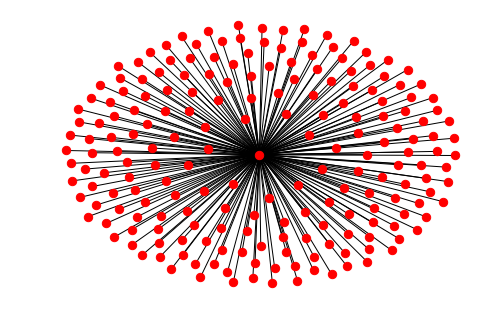

In [10]:
#Import Data

with open('Data/facebook-gonxheidrizi-oct2017-oct2018/friends/friends.json', 'r') as f:
    data = json.load(f)
    
#print data
list_names = ['Gonxhe Idrizi']
list_me = ['Gonxhe Idrizi']
edges = []
for i in range(200):
    list_names.append(data['friends'][i]['name'])
    edges.append(('Gonxhe Idrizi', data['friends'][i]['name']))
    list_me.append('Gonxhe Idrizi')

G_Facebook = nx.Graph()
G_Facebook.add_edges_from(edges)
#print(G_Facebook.edges)
dic = nx.spring_layout(G_Facebook)
nx.draw(G_Facebook, pos = dic, with_labels=False, node_size=70)

## Graph Plotting using Networkx and MatPlotLib

In [4]:
N=50
# Build a dataframe with your connections
from_list = [random.randint(0,N-1) for i in range(0,N-1)]
to_list = [random.randint(0,N-1) for i in range(0,N-1)]
edges = zip(from_list, to_list)

# Build your graph
G = nx.Graph()
G.add_edges_from(edges)
G.add_nodes_from(range(0,N-1))

#Components
g2 = nx.Graph()
g2 = nx.balanced_tree(2,5)

#Palette color
palette = (sns.hls_palette(n_colors=N,l=.3, s=.8))

In [5]:
def draw_greedy_communities(g, layout, num, title):
    nodeList = tuple(g.nodes())
    pos = layout(g)
    set_nodes = greedy_modularity_communities(g)
    list_nodes = [list(x) for x in set_nodes]
    node_color = [0]*len(nodeList)
    n = -1
    count = 0
    for group in list_nodes[:]:
        n += 1
        for i in group[:]:
            count+=1
            node_color[i] = n
    node_color_tuple = tuple(node_color)
    nx.draw(g, with_labels= True, pos = pos, node_size=200, nodelist = nodeList,
            node_color= node_color_tuple, cmap=plt.cm.Spectral,
            ax = plt.subplot(num))
    plt.title(title)

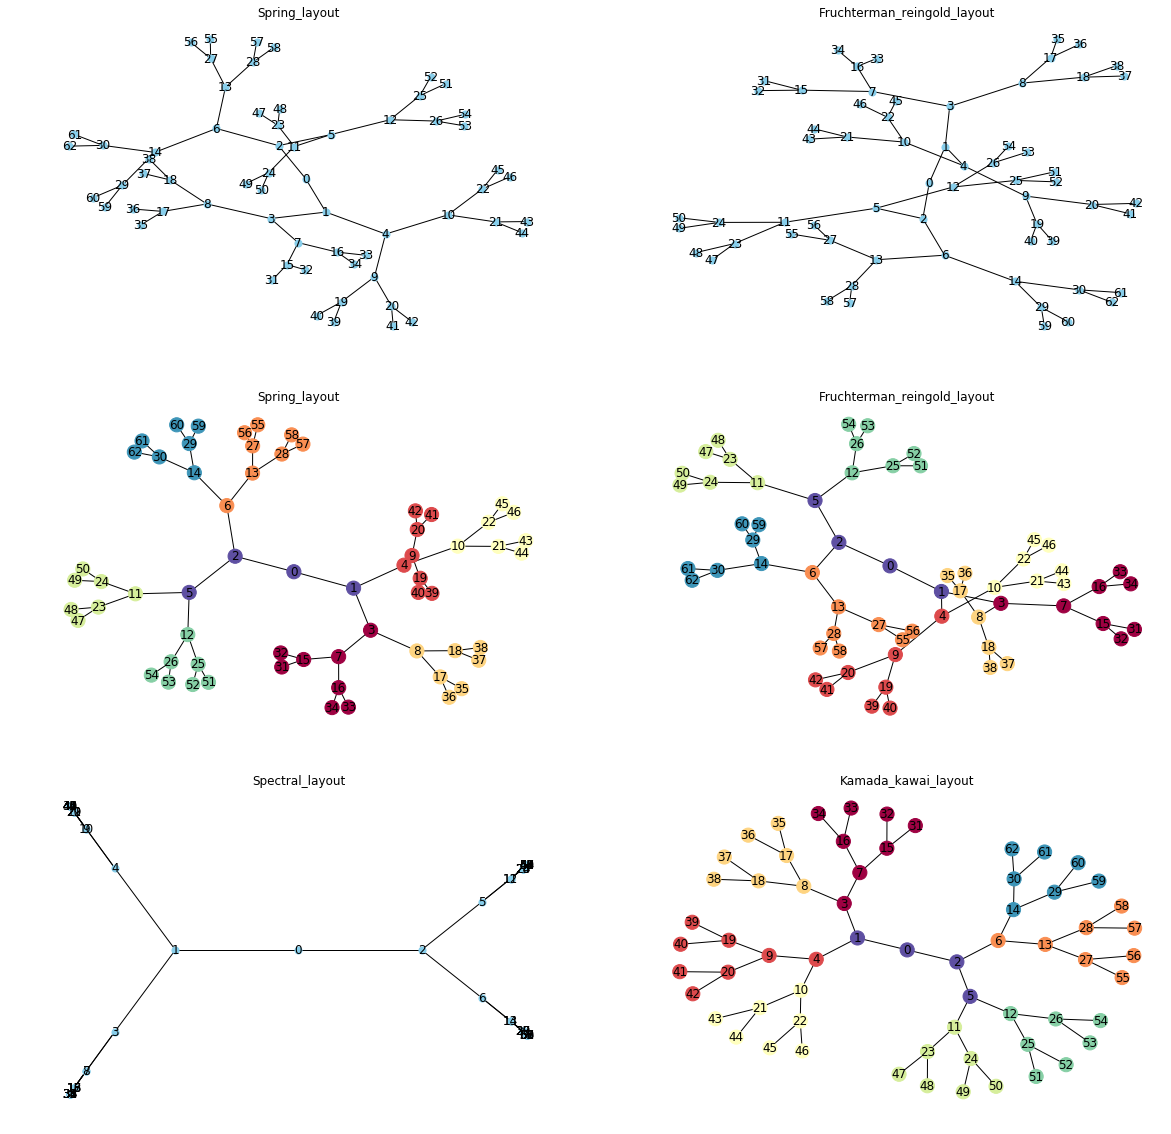

In [14]:
#Creating a figure to add subplots
fig = plt.figure(figsize = (20, 20))

# Spring
plt.subplot(321)
nx.draw(g2, with_labels=True, node_size=50, node_color="skyblue", pos = nx.spring_layout(g2))
plt.title("Spring_layout")

# Spring + Modularity communities
draw_greedy_communities(g2, nx.spring_layout, 323, "Spring_layout")

# Fruchterman_reingold_layout
plt.subplot(322)
nx.draw(g2, with_labels=True, node_size=50, node_color="skyblue", pos=nx.fruchterman_reingold_layout(g2))
plt.title("Fruchterman_reingold_layout")

# Fruchterman_reingold_layout + Modularity communities
draw_greedy_communities(g2, nx.fruchterman_reingold_layout, 324, "Fruchterman_reingold_layout")

# Spectral
plt.subplot(325)
nx.draw(g2, with_labels=True, node_size=50, node_color="skyblue", pos=nx.spectral_layout(g2))
plt.title("Spectral_layout")

# kamada_kawai_layout + Modularity communities
draw_greedy_communities(g2, nx.kamada_kawai_layout, 326, "Kamada_kawai_layout")

plt.show()

## Graph plotting using Bokeh

**Source** : https://bokeh.pydata.org/en/latest/docs/user_guide/graph.html

In [12]:
#Bokeh
plot = Plot(plot_height = 1000, 
           plot_width = 1000,
           x_range=Range1d(-100, 100), 
           y_range=Range1d(-100, 100))
plot.title.text = "Bokeh"
G_Bokeh = GraphRenderer()
nod = G_Bokeh.node_renderer
edg = G_Bokeh.edge_renderer
node_indices = list(G_Facebook.nodes())

nod.data_source.add(node_indices, 'index')
nod.data_source.add(magma(len(node_indices)), 'color')
nod.glyph = Circle(size=20,
                   fill_color="color")

edg.data_source.data = dict(
    start=list(list_me),
    end=list(list_names))

# start of layout code
x = [random.randint(-50,50) for i in node_indices]
y = [random.randint(-50,50) for i in node_indices]

index_hover = [
    ("name", "@index")
]

plot.add_tools(HoverTool(tooltips = index_hover))

graph_layout = dict(zip(node_indices, zip(x, y)))
G_Bokeh.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

G_Bokeh.inspection_policy = NodesOnly()
plot.renderers.append(G_Bokeh)
output_notebook()
show(plot)

Loading BokehJS ...

## Graph Plotting using Gephi

[(42, 4), (42, 39), (42, 46), (42, 28), (4, 41), (4, 13), (9, 6), (9, 30), (9, 38), (9, 12), (1, 28), (1, 35), (28, 5), (22, 10), (22, 21), (10, 5), (10, 12), (10, 7), (30, 35), (30, 29), (38, 35), (38, 39), (35, 0), (21, 32), (46, 16), (16, 20), (5, 2), (5, 39), (5, 19), (27, 26), (26, 26), (45, 23), (23, 48), (2, 39), (2, 13), (19, 0), (0, 11), (0, 31), (39, 33), (37, 29), (29, 47), (32, 18), (18, 3), (14, 24), (49, 43), (12, 25), (48, 15), (33, 13)]


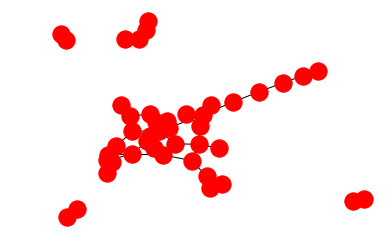

In [8]:
plt.plot()
G_Gephi = nx.Graph()
G_Gephi.add_edges_from(zip(from_list, to_list))
print(G_Gephi.edges)
dic = nx.spring_layout(G_Gephi)
nx.draw(G_Gephi, pos = dic)
gexf.write_gexf(G_Gephi, path="test.gexf")

The graph obtained in test.gexf file isn't the same as the one outputed by jupyter notebooks, as we can see in below:

In [16]:
img_gephi_graph_specral = 'spectral_graph_first.PNG'
Image(url=img_gephi_graph_specral)